In [10]:
import pandas as pd


Dataset **1**

In [13]:
df = pd.read_csv("/content/ihdp.csv")
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x20,x21,x22,x23,x24,x25,t,yf,ycf,ite
0,1.397395,0.996346,-1.105624,-0.879606,0.308569,-1.023402,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.771232,-0.298509,4.657928
1,0.269033,0.196818,0.383828,0.161703,-0.629189,1.460832,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.956273,5.783770,3.428604
2,1.051537,1.795874,-1.105624,0.161703,-0.629189,0.963985,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.164164,7.055789,3.658195
3,0.662446,0.196818,-0.733261,-0.879606,0.371086,-0.692171,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.172307,1.379697,4.585505
4,0.856992,1.795874,0.011465,-0.879606,0.558638,0.301522,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.834469,2.747986,4.265591


In [14]:
import numpy as np

def pehe(effect_true, effect_pred):
    """
    Precision in Estimating the Heterogeneous Treatment Effect (PEHE)
    :param effect_true: true treatment effect value
    :param effect_pred: predicted treatment effect value
    :return: PEHE
    """
    # This function should be completed as part of Unit 4.

def abs_ate(effect_true, effect_pred):
    """
    Absolute error for the Average Treatment Effect (ATE)
    :param effect_true: true treatment effect value
    :param effect_pred: predicted treatment effect value
    :return: absolute error on ATE
    """
    # This function should be completed as part of Unit 4.

def abs_att(effect_pred, yf, t, e):
    """
    Absolute error for the Average Treatment Effect on the Treated
    :param effect_pred: predicted treatment effect value
    :param yf: factual (observed) outcome
    :param t: treatment status (treated/control)
    :param e: whether belongs to the experimental group
    :return: absolute error on ATT
    """
    att_true = np.mean(yf[t > 0]) - np.mean(yf[(1 - t + e) > 1])
    att_pred = np.mean(effect_pred[(t + e) > 1])

    return np.abs(att_pred - att_true)

def policy_risk(effect_pred, yf, t, e):
    """
    Computes the risk of the policy defined by predicted effect
    :param effect_pred: predicted treatment effect value
    :param yf: factual (observed) outcome
    :param t: treatment status (treated/control)
    :param e: whether belongs to the experimental group
    :return: policy risk
    """
    # Consider only the cases for which we have experimental data (i.e., e > 0)
    t_e = t[e > 0]
    yf_e = yf[e > 0]
    effect_pred_e = effect_pred[e > 0]

    if np.any(np.isnan(effect_pred_e)):
        return np.nan

    policy = effect_pred_e > 0.0
    treat_overlap = (policy == t_e) * (t_e > 0)
    control_overlap = (policy == t_e) * (t_e < 1)

    if np.sum(treat_overlap) == 0:
        treat_value = 0
    else:
        treat_value = np.mean(yf_e[treat_overlap])

    if np.sum(control_overlap) == 0:
        control_value = 0
    else:
        control_value = np.mean(yf_e[control_overlap])

    pit = np.mean(policy)
    policy_value = pit * treat_value + (1.0 - pit) * control_value

    return 1.0 - policy_value

In [17]:
df.drop("x5", axis=1)

,x1,x2,x3,x4,x6,x7,x8,x9,x10,x11,...,x20,x21,x22,x23,x24,x25,t,yf,ycf,ite
0,1.397395,0.996346,-1.105624,-0.879606,-1.023402,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.771232,-0.298509,4.657928
1,0.269033,0.196818,0.383828,0.161703,1.460832,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.956273,5.783770,3.428604
2,1.051537,1.795874,-1.105624,0.161703,0.963985,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.164164,7.055789,3.658195
3,0.662446,0.196818,-0.733261,-0.879606,-0.692171,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.172307,1.379697,4.585505
4,0.856992,1.795874,0.011465,-0.879606,0.301522,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.834469,2.747986,4.265591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,-1.853672,-2.201766,1.500917,0.161703,-1.023402,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.244050,5.269701,4.598246
743,-1.066845,-1.402238,1.128554,2.244320,2.288910,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.253175,8.393338,0.940855
744,-1.045229,-1.337276,1.128554,-0.879606,0.301522,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.908235,6.897207,4.373736
745,-0.115735,-0.602710,-1.105624,2.244320,2.785756,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.324520,9.208251,0.352653


In [21]:
from sklearn.datasets import make_regression

In [22]:
n_samples = 100 
n_features = 6 
n_informative = 3

In [23]:
X, y,coef = make_regression(n_samples=n_samples, n_features=n_features, n_informative=n_informative,
                       random_state=None, shuffle=False,noise=20,coef=True)

In [24]:
df1 = pd.DataFrame(data=X,columns=['X'+str(i) for i in range(1,n_features+1)])
df2=pd.DataFrame(data=y,columns=['y'])
df=pd.concat([df1,df2],axis=1)
df.head(10)

,X1,X2,X3,X4,X5,X6,y
0,-0.190274,0.040708,-0.560051,-0.629649,-1.269060,0.891118,-56.521555
1,-0.060947,0.604217,-0.948441,1.133892,0.187528,-0.431255,-9.772593
2,1.173969,0.373352,0.033462,-0.786497,0.176670,-0.516110,77.176872
3,2.716428,-0.043560,0.704683,1.396367,-0.035803,-1.204916,94.986873
4,0.353046,-1.354417,1.150675,1.592245,0.180630,1.480738,-42.998354
5,-0.555176,0.897223,-1.011986,-0.358170,1.941785,1.797454,-34.990844
6,0.055467,0.801993,-0.037188,0.024113,0.439134,-1.723097,52.240880
7,-1.096609,-1.682027,0.167075,-1.094385,-1.329473,-1.172405,-163.238618
8,1.063557,-0.083384,0.797917,1.310611,-0.436689,-1.566584,55.513824
9,0.498130,-0.946547,0.758045,-0.119075,-1.189458,0.054886,-32.401404


In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

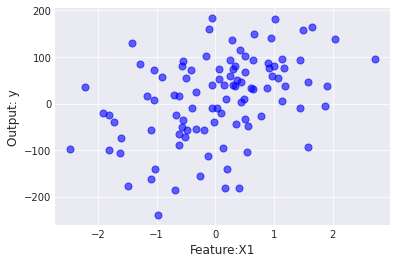

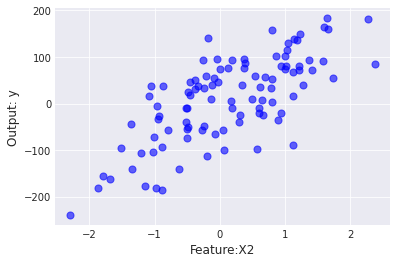

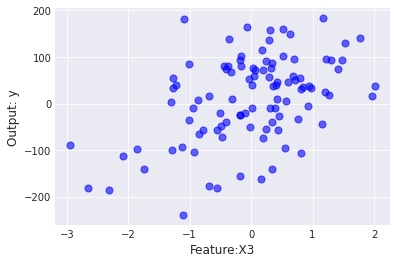

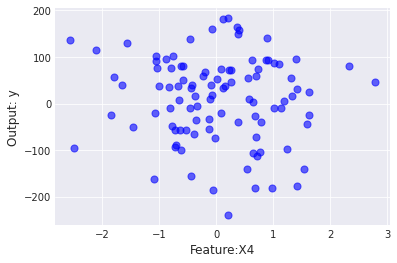

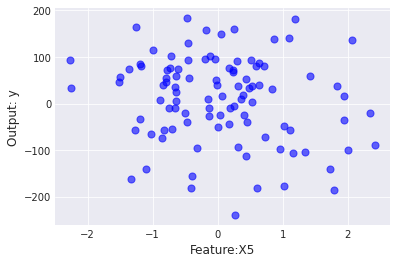

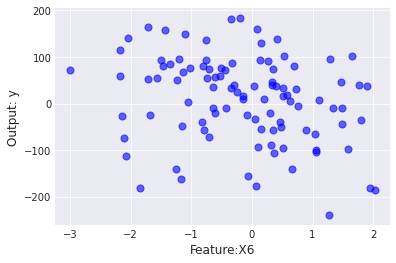

In [28]:
with plt.style.context(('seaborn-dark')):
    for i,col in enumerate(df.columns[:-1]):
        plt.figure(figsize=(6,4))
        plt.grid(True)
        plt.xlabel('Feature:'+col,fontsize=12)
        plt.ylabel('Output: y',fontsize=12)
        plt.scatter(df[col],df['y'],c='blue',s=50,alpha=0.6)

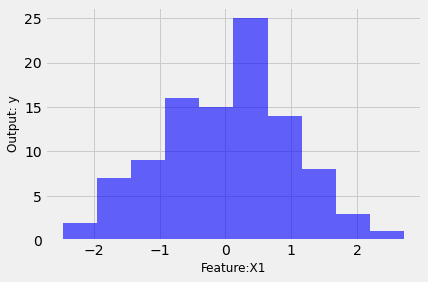

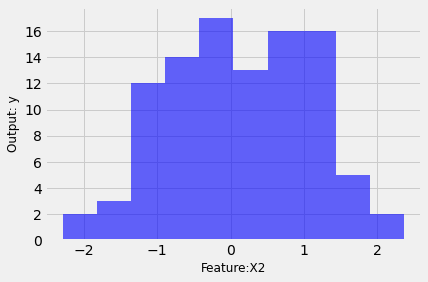

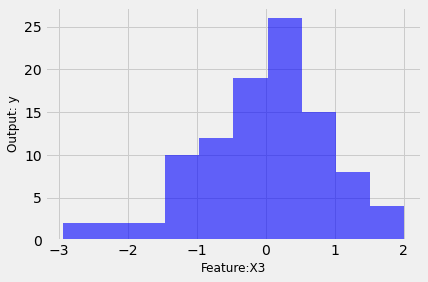

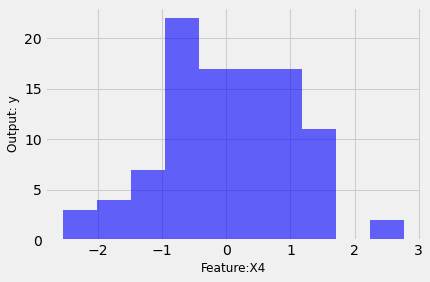

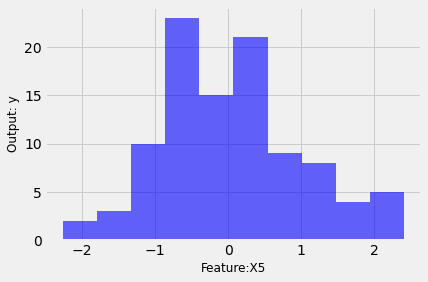

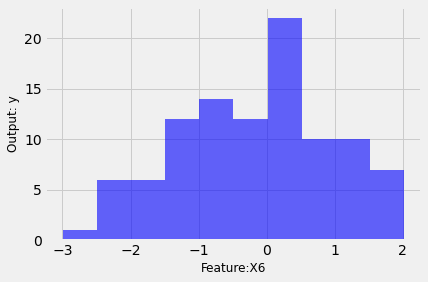

In [30]:
with plt.style.context(('fivethirtyeight')):
    for i,col in enumerate(df.columns[:-1]):
        plt.figure(figsize=(6,4))
        plt.grid(True)
        plt.xlabel('Feature:'+col,fontsize=12)
        plt.ylabel('Output: y',fontsize=12)
        plt.hist(df[col],alpha=0.6,facecolor='b')

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn import datasets
import scipy.stats as stats

In [67]:
clf = RandomForestRegressor()
scores = cross_val_score(clf, X, y, cv=10,scoring='neg_mean_squared_error') # 10-fold cross-validation
print("MSE:"+ str(-scores.mean()))

MSE:1.4662949845656912


In [68]:
clf = SVR()
scores = cross_val_score(clf, X, y, cv=10,scoring='neg_mean_squared_error')
print("MSE:"+ str(-scores.mean()))

MSE:0.9827747618985331


In [69]:
clf = KNeighborsRegressor()
scores = cross_val_score(clf, X, y, cv=10,scoring='neg_mean_squared_error')
print("MSE:"+ str(-scores.mean()))

MSE:1.1394730249434715


In [35]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
def ANN(optimizer = 'adam',neurons=32,batch_size=32,epochs=50,activation='relu',patience=5,loss='mse'):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(X.shape[1],), activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer = optimizer, loss=loss)
    early_stopping = EarlyStopping(monitor="loss", patience = patience)# early stop patience
    history = model.fit(X, y,
              batch_size=batch_size,
              epochs=epochs,
              callbacks = [early_stopping],
              verbose=0) #verbose set to 1 will show the training process
    return model

In [36]:
clf = KerasRegressor(build_fn=ANN, verbose=0)
scores = cross_val_score(clf, X, y, cv=3,scoring='neg_mean_squared_error')
print("MSE:"+ str(-scores.mean()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


MSE:5837.300770253077


In [37]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': [10, 20, 30],
    #'max_features': ['sqrt',0.5],
    'max_depth': [15,20,30,50],
    #'min_samples_leaf': [1,2,4,8],
    #"bootstrap":[True,False],
    #"criterion":['mse','mae']
}
clf = RandomForestRegressor(random_state=0)
grid = GridSearchCV(clf, rf_params, cv=3, scoring='neg_mean_squared_error')
grid.fit(X, y)
print(grid.best_params_)
print("MSE:"+ str(-grid.best_score_))

{'max_depth': 15, 'n_estimators': 30}
MSE:2094.104978374881


In [38]:
from sklearn.model_selection import GridSearchCV
rf_params = {
    'C': [1,10, 100],
    "kernel":['poly','rbf','sigmoid'],
    "epsilon":[0.01,0.1,1]
}
clf = SVR(gamma='scale')
grid = GridSearchCV(clf, rf_params, cv=3, scoring='neg_mean_squared_error')
grid.fit(X, y)
print(grid.best_params_)
print("MSE:"+ str(-grid.best_score_))

{'C': 100, 'epsilon': 1, 'kernel': 'rbf'}
MSE:1966.0013121579868


In [66]:
from sklearn.model_selection import GridSearchCV
rf_params = {
    'n_neighbors': [2, 3, 5, 7, 10]
}
clf = KNeighborsRegressor()
grid = GridSearchCV(clf, rf_params, cv=10, scoring='neg_mean_squared_error')
grid.fit(X, y)
print(grid.best_params_)
print("MSE:"+ str(-grid.best_score_))

{'n_neighbors': 10}
MSE:1.0789139924635323


In [41]:
from scipy.stats import randint as sp_randint
from random import randrange as sp_randrange
from sklearn.model_selection import RandomizedSearchCV
rf_params = {
    'optimizer': ['adam','rmsprop'],
    'activation': ['relu','tanh'],
    'loss': ['mse','mae'],
    'batch_size': [16,32,64],
    'neurons':sp_randint(10,100),
    'epochs':[20,50],
    #'epochs':[20,50,100,200],
    'patience':sp_randint(3,20)
}
n_iter_search=10
clf = KerasRegressor(build_fn=ANN, verbose=0)
Random = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=3,scoring='neg_mean_squared_error')
Random.fit(X, y)
print(Random.best_params_)
print("MSE:"+ str(-Random.best_score_))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  from ipykernel import kernelapp as app


{'activation': 'relu', 'batch_size': 16, 'epochs': 50, 'loss': 'mse', 'neurons': 74, 'optimizer': 'adam', 'patience': 12}
MSE:521.9782268331877


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      100 non-null    float64
 1   X2      100 non-null    float64
 2   X3      100 non-null    float64
 3   X4      100 non-null    float64
 4   X5      100 non-null    float64
 5   X6      100 non-null    float64
 6   y       100 non-null    float64
dtypes: float64(7)
memory usage: 5.6 KB


In [43]:
df.describe()

,X1,X2,X3,X4,X5,X6,y
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.040816,0.124940,-0.009875,0.030211,0.044320,-0.154509,10.564440
std,1.007363,0.964543,0.960129,0.996207,0.982037,1.109188,91.675515
min,-2.476973,-2.293428,-2.947043,-2.553706,-2.268594,-2.999148,-240.482870
25%,-0.585465,-0.500905,-0.525230,-0.633561,-0.667551,-0.869163,-48.201070
50%,0.145300,0.096912,0.118036,-0.000483,0.017466,-0.075455,27.326539
75%,0.644032,0.907072,0.580011,0.699404,0.591875,0.522583,77.188662
max,2.716428,2.369442,2.009193,2.773656,2.410783,2.022496,184.360436


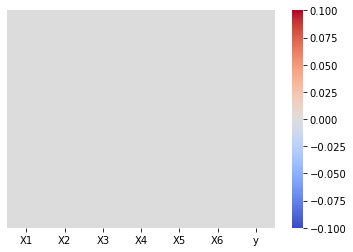

In [44]:
sns.heatmap(df.isnull(), cmap='coolwarm', yticklabels= False)

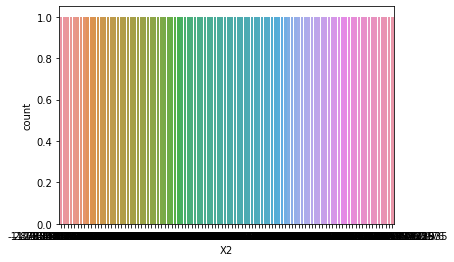

In [48]:
sns.countplot(x = df['X2'])

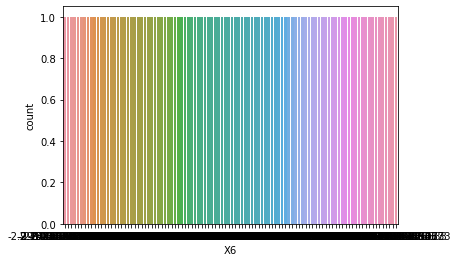

In [49]:
sns.countplot(x = df['X6'])

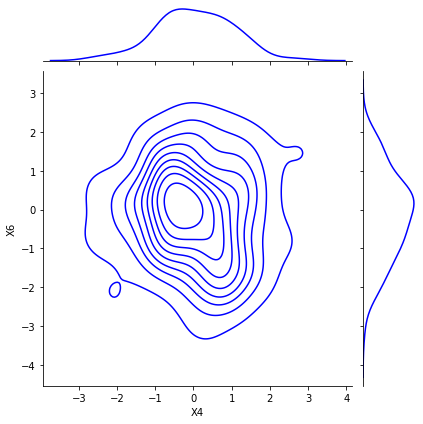

In [51]:
sns.jointplot(x = 'X4', y= 'X6', data = df, kind='kde', color = 'blue')

In [58]:
from sklearn.model_selection import train_test_split

In [60]:
X = df.drop('X3', axis = 1)
y = df['X3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
X = df[['X3']].values 
Y = df[['X5']].values 

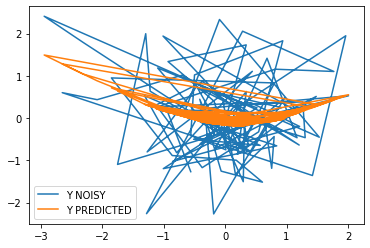

In [65]:
from math import ceil
import numpy as np
from scipy import linalg  
 
 
def lowess(x, y, f= 2. / 3., iter=3):
    
    n = len(x) # Number of x  points 
    r = int(ceil(f * n))  # Computing the residual of smoothing functions 
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)] # 
    w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)  # Weight Function 
    w = (1 - w ** 3) ** 3  # Tricube Weight Function
    ypred = np.zeros(n) # Initialisation of predictor 
    delta = np.ones(n)  # Initialisation of delta
   
    for iteration in range(iter):
        for i in range(n):
            weights = delta * w[:, i] # Cumulative Weights 
            b = np.array([np.sum(weights * y), np.sum(weights * y * x)]) # Matrix B
            A = np.array([[np.sum(weights), np.sum(weights * x)],
                          [np.sum(weights * x), np.sum(weights * x * x)]]) # Matrix A
                      
            beta = linalg.solve(A, b) # Beta,Solution of AX= B equation 
            ypred[i] = beta[0] + beta[1] * x[i]
             
        residuals = y - ypred   # Finding Residuals
        s = np.median(np.abs(residuals))  # Median of Residuals
        delta = np.clip(residuals / (6.0 * s), -1, 1)  # Delta
        delta = (1 - delta ** 2) ** 2   # Delta 
 
    return ypred
 
if __name__ == '__main__':  # Main Function
    
    import math
    
    n = 100  # Number of data points
   
    #Case1: Sinusoidal Fitting 
    x = X[:100].ravel()   
    y = Y[:100].ravel()   # Noisy data
       
    
    
    f = 0.66
    ypred = lowess(x, y, f=f, iter=3)  # Predicted  Data
    
    import pylab as pl
    pl.clf()
    pl.plot(x, y, label='Y NOISY')
    pl.plot(x, ypred, label='Y PREDICTED')
    pl.legend()
    pl.show()

In [121]:
import dowhy
from dowhy import CausalModel
import dowhy.datasets

import econml
import warnings
warnings.filterwarnings('ignore')

BETA = 10

In [123]:
from econml.dml import DML
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor
est = DML(model_y=GradientBoostingRegressor(),
          model_t=GradientBoostingRegressor(),
          model_final=LassoCV(fit_intercept=False))

In [124]:
import inspect
import numpy as np
import warnings
from joblib import Parallel, delayed
from sklearn.linear_model import LassoCV, Lasso, LinearRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor


def cross_product(X1, X2):
    
    assert np.shape(X1)[0] == np.shape(X2)[0]
    return np.array([np.dot(X1[t].reshape(-1, 1), X2[t].reshape(1, -1)).flatten('F').T for t in range(np.shape(X1)[0])])


class HeteroDML(object):
    
    def __init__(self, poly_degree=3,
                            model_T=LassoCV(),
                            model_Y=LassoCV()):
        self.poly_degree = poly_degree
        self.model_T = model_T
        self.model_Y = model_Y
        self.model_final = LinearRegression(fit_intercept=False)
    
    def fit(self, W, x, T, Y):
        poly_x = PolynomialFeatures(degree=self.poly_degree, include_bias=True).fit_transform(x)
        composite_W = cross_product(poly_x, W)

        res_T = np.zeros(W.shape[0])
        res_Y = np.zeros(W.shape[0])
        
        kf = KFold(n_splits=2)
        for train_index, test_index in kf.split(W):
            # Split the data in half, train and test
            composite_W_train, W_train, T_train, Y_train = composite_W[train_index], W[train_index], T[train_index], Y[train_index]
            composite_W_test, W_test, T_test, Y_test  = composite_W[test_index], W[test_index], T[test_index], Y[test_index]
            
            # Fit with LassoCV the treatment as a function of W and the outcome as
            # a function of W, using only the train fold
            self.model_T.fit(W_train, T_train)
            self.model_Y.fit(composite_W_train, Y_train)
            
            # Then compute residuals T-g(W) and Y-f(W) on test fold
            res_T[test_index] = (T_test - self.model_T.predict(W_test))
            res_Y[test_index] = (Y_test - self.model_Y.predict(composite_W_test))
        
        self.model_final.fit(cross_product(poly_x, res_T.reshape(-1, 1)), res_Y.flatten())

    
    def predict(self, x):
        poly_x = PolynomialFeatures(degree=self.poly_degree, include_bias=True).fit_transform(x)
        return np.dot(poly_x, self.model_final.coef_.reshape(-1, 1)).flatten()


class ForestHeteroDML(object):
    
    def __init__(self):
        self.model_T = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_leaf=10)
        self.model_Y = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_leaf=10)
        self.model_final = RandomForestRegressor(n_estimators=100, max_depth=10, min_impurity_split=10)
    
    def fit(self, W, x, T, Y):

        res_T = np.zeros(W.shape[0])
        res_Y = np.zeros(W.shape[0])
        
        kf = KFold(n_splits=2)
        for train_index, test_index in kf.split(W):
            # Split the data in half, train and test
            x_train, W_train, T_train, Y_train = x[train_index], W[train_index], T[train_index], Y[train_index]
            x_test, W_test, T_test, Y_test  = x[test_index], W[test_index], T[test_index], Y[test_index]
            
            # Fit with LassoCV the treatment as a function of W and the outcome as
            # a function of W, using only the train fold
            self.model_T.fit(W_train, T_train)
            self.model_Y.fit(np.concatenate((x_train, W_train), axis=1), Y_train)
            
            # Then compute residuals T-g(W) and Y-f(W) on test fold
            res_T[test_index] = (T_test - self.model_T.predict(W_test))
            res_Y[test_index] = (Y_test - self.model_Y.predict(np.concatenate((x_test, W_test), axis=1)))

        self.model_final.fit(np.concatenate((x, res_T.reshape(-1, 1)), axis=1), res_Y.flatten())
        self.res_T = res_T

    
    def predict(self, x):
        # We create fake treatment points from the same distribution as the residuals created during the fit process
        # For each target x, we evaluate the model_final.predict for each such treatment point, and then we average
        # over the predictions to get the prediction at x, i.e. \tau(x) = E_{res_T\sim D_train}[predict(x, res_T)]
        return np.mean([self.model_final.predict(np.concatenate((x, np.ones((x.shape[0],1))*t), axis=1)).flatten()/(t+0.00001) for  t in self.res_T.flatten()], axis=0).flatten()


In [132]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': [10, 20, 30],
    #'max_features': ['sqrt',0.5],
    'max_depth': [15,20,30,50],
    #'min_samples_leaf': [1,2,4,8],
    #"bootstrap":[True,False],
    #"criterion":['mse','mae']
}
clf = RandomForestRegressor(random_state=0)
grid = GridSearchCV(clf, rf_params, cv=3, scoring='neg_mean_squared_error')
grid.fit(X, y)
print(grid.best_params_)
print("MSE:"+ str(-grid.best_score_))

{'max_depth': 20, 'n_estimators': 20}
MSE:1.0562840272128313


In [133]:
from sklearn.model_selection import GridSearchCV
rf_params = {
    'C': [1,10, 100],
    "kernel":['poly','rbf','sigmoid'],
    "epsilon":[0.01,0.1,1]
}
clf = SVR(gamma='scale')
grid = GridSearchCV(clf, rf_params, cv=3, scoring='neg_mean_squared_error')
grid.fit(X, y)
print(grid.best_params_)
print("MSE:"+ str(-grid.best_score_))

{'C': 1, 'epsilon': 0.1, 'kernel': 'poly'}
MSE:0.8004480314930628


In [134]:
from sklearn.model_selection import GridSearchCV
rf_params = {
    'n_neighbors': [2, 3, 5, 7, 10]
}
clf = KNeighborsRegressor()
grid = GridSearchCV(clf, rf_params, cv=3, scoring='neg_mean_squared_error')
grid.fit(X, y)
print(grid.best_params_)
print("MSE:"+ str(-grid.best_score_))

{'n_neighbors': 10}
MSE:0.9304325488848337


In [135]:
from sklearn.model_selection import GridSearchCV
rf_params = {
    'optimizer': ['adam','rmsprop'],
    'activation': ['relu','tanh'],
    'loss': ['mse','mae'],
    'batch_size': [16,32],
    'neurons':[16,32],
    'epochs':[20,50],
    'patience':[2,5]
}
clf = KerasRegressor(build_fn=ANN, verbose=0)
grid = GridSearchCV(clf, rf_params, cv=3,scoring='neg_mean_squared_error')
grid.fit(X, y)
print(grid.best_params_)
print("MSE:"+ str(-grid.best_score_))

{'activation': 'tanh', 'batch_size': 16, 'epochs': 50, 'loss': 'mse', 'neurons': 32, 'optimizer': 'rmsprop', 'patience': 5}
MSE:0.8080005941457739


**DATASET 2**

In [72]:
import pandas as pd

In [73]:
df = pd.read_csv("/content/jobs.csv")
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,t,y,e
0,-0.614282,1.464727,0.0,0.0,1.0,0.0,2.393250,2.746196,-0.653311,-0.656913,1.627531,2.462337,2.937244,0.0,0.0,2.843909,0.0,0.0,1.0,0.0
1,-0.802463,0.101835,0.0,0.0,1.0,0.0,0.109885,0.498271,-0.785284,-0.743407,-0.022502,-0.177193,0.082537,0.0,0.0,0.038422,0.0,0.0,1.0,0.0
2,-0.896553,-0.238888,1.0,0.0,1.0,1.0,-0.085212,-0.148097,-0.847312,-0.781606,-0.361348,-0.286221,-0.303615,0.0,0.0,-0.191304,0.0,0.0,1.0,0.0
3,-0.896553,-0.238888,0.0,0.0,0.0,1.0,0.405581,0.325594,-0.847312,-0.781606,-0.361348,0.023020,-0.039630,0.0,0.0,0.173108,0.0,0.0,1.0,1.0
4,0.138440,-1.601779,1.0,0.0,1.0,1.0,-0.722531,-0.212734,-0.019840,-0.156019,-1.422084,-0.514563,-0.331552,0.0,0.0,-0.779227,0.0,0.0,1.0,0.0


In [74]:
import numpy as np

def pehe(effect_true, effect_pred):
    """
    Precision in Estimating the Heterogeneous Treatment Effect (PEHE)
    :param effect_true: true treatment effect value
    :param effect_pred: predicted treatment effect value
    :return: PEHE
    """
    # This function should be completed as part of Unit 4.

def abs_ate(effect_true, effect_pred):
    """
    Absolute error for the Average Treatment Effect (ATE)
    :param effect_true: true treatment effect value
    :param effect_pred: predicted treatment effect value
    :return: absolute error on ATE
    """
    # This function should be completed as part of Unit 4.

def abs_att(effect_pred, yf, t, e):
    """
    Absolute error for the Average Treatment Effect on the Treated
    :param effect_pred: predicted treatment effect value
    :param yf: factual (observed) outcome
    :param t: treatment status (treated/control)
    :param e: whether belongs to the experimental group
    :return: absolute error on ATT
    """
    att_true = np.mean(yf[t > 0]) - np.mean(yf[(1 - t + e) > 1])
    att_pred = np.mean(effect_pred[(t + e) > 1])

    return np.abs(att_pred - att_true)

def policy_risk(effect_pred, yf, t, e):
    """
    Computes the risk of the policy defined by predicted effect
    :param effect_pred: predicted treatment effect value
    :param yf: factual (observed) outcome
    :param t: treatment status (treated/control)
    :param e: whether belongs to the experimental group
    :return: policy risk
    """
    # Consider only the cases for which we have experimental data (i.e., e > 0)
    t_e = t[e > 0]
    yf_e = yf[e > 0]
    effect_pred_e = effect_pred[e > 0]

    if np.any(np.isnan(effect_pred_e)):
        return np.nan

    policy = effect_pred_e > 0.0
    treat_overlap = (policy == t_e) * (t_e > 0)
    control_overlap = (policy == t_e) * (t_e < 1)

    if np.sum(treat_overlap) == 0:
        treat_value = 0
    else:
        treat_value = np.mean(yf_e[treat_overlap])

    if np.sum(control_overlap) == 0:
        control_value = 0
    else:
        control_value = np.mean(yf_e[control_overlap])

    pit = np.mean(policy)
    policy_value = pit * treat_value + (1.0 - pit) * control_value

    return 1.0 - policy_value

In [75]:
df.drop("x5", axis=1)

,x1,x2,x3,x4,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,t,y,e
0,-0.614282,1.464727,0.0,0.0,0.0,2.393250,2.746196,-0.653311,-0.656913,1.627531,2.462337,2.937244,0.0,0.0,2.843909,0.0,0.0,1.0,0.0
1,-0.802463,0.101835,0.0,0.0,0.0,0.109885,0.498271,-0.785284,-0.743407,-0.022502,-0.177193,0.082537,0.0,0.0,0.038422,0.0,0.0,1.0,0.0
2,-0.896553,-0.238888,1.0,0.0,1.0,-0.085212,-0.148097,-0.847312,-0.781606,-0.361348,-0.286221,-0.303615,0.0,0.0,-0.191304,0.0,0.0,1.0,0.0
3,-0.896553,-0.238888,0.0,0.0,1.0,0.405581,0.325594,-0.847312,-0.781606,-0.361348,0.023020,-0.039630,0.0,0.0,0.173108,0.0,0.0,1.0,1.0
4,0.138440,-1.601779,1.0,0.0,1.0,-0.722531,-0.212734,-0.019840,-0.156019,-1.422084,-0.514563,-0.331552,0.0,0.0,-0.779227,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3207,1.737976,1.805449,0.0,0.0,0.0,4.235839,-1.110467,1.887171,1.995900,2.113702,6.424008,-0.518815,0.0,1.0,5.197260,0.0,0.0,0.0,0.0
3208,-0.520192,0.101835,0.0,0.0,0.0,0.239950,0.289997,-0.583365,-0.608340,-0.022502,-0.094318,-0.063091,0.0,0.0,0.143774,0.0,0.0,1.0,0.0
3209,-0.802463,0.442558,1.0,0.0,0.0,0.124337,0.692182,-0.785284,-0.743407,0.345809,-0.168387,0.236242,0.0,0.0,0.135970,0.0,0.0,1.0,0.0
3210,0.702982,0.101835,0.0,0.0,0.0,0.341112,0.670636,0.566120,0.413295,-0.022502,-0.024223,0.218301,0.0,0.0,0.225715,0.0,0.0,1.0,0.0


In [76]:
from sklearn.datasets import make_regression

In [77]:
n_samples = 100 
n_features = 6 
n_informative = 3

In [78]:
X, y,coef = make_regression(n_samples=n_samples, n_features=n_features, n_informative=n_informative,
                       random_state=None, shuffle=False,noise=20,coef=True)

In [79]:
df1 = pd.DataFrame(data=X,columns=['X'+str(i) for i in range(1,n_features+1)])
df2=pd.DataFrame(data=y,columns=['y'])
df=pd.concat([df1,df2],axis=1)
df.head(10)

,X1,X2,X3,X4,X5,X6,y
0,0.360342,0.578390,2.267073,1.503282,1.318333,-1.596077,81.570437
1,-1.106856,1.535684,0.156779,0.344149,-0.569548,0.173591,-9.043809
2,0.581874,-1.986295,1.223103,2.369410,0.163934,-0.626783,-16.889041
3,-0.562554,0.053930,0.102990,-0.611357,0.582739,-0.374452,-58.305669
4,-0.279020,-1.006510,-0.838732,-1.697563,1.359339,0.273624,-114.516712
5,-0.825180,-1.690526,-0.057204,-0.251600,1.653840,0.446294,-165.471629
6,-0.578473,-0.269812,-0.043305,-1.255094,-1.367667,0.776654,-114.905641
7,1.209435,-0.913866,-1.303638,0.844269,-0.161713,0.831717,-14.360938
8,-0.430862,-0.315620,0.808774,0.054788,1.528477,-0.483452,-44.683616
9,0.177619,2.096831,-0.701072,0.702325,1.289886,1.157469,109.558156


In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

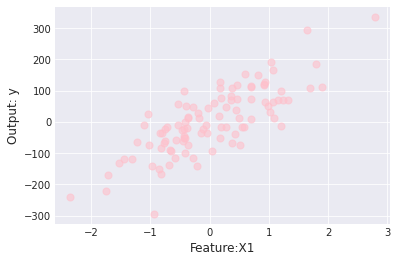

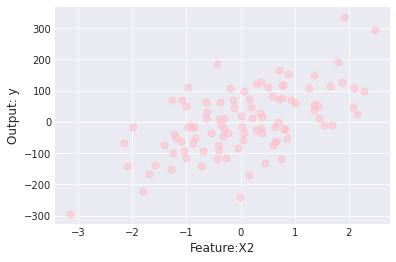

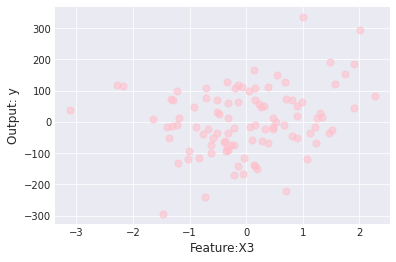

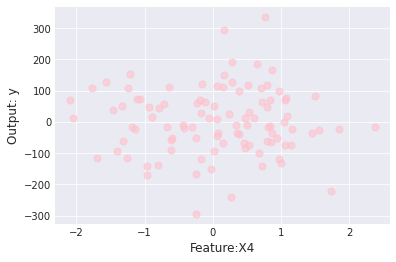

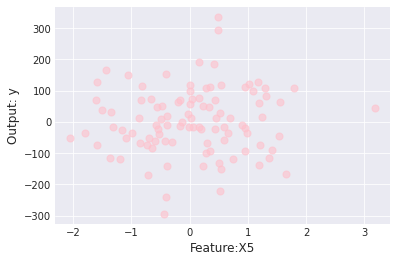

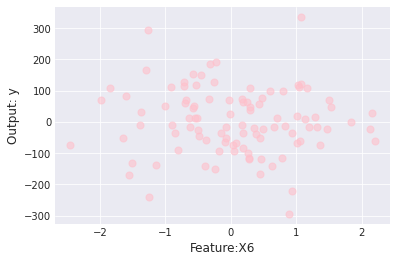

In [82]:
with plt.style.context(('seaborn-dark')):
    for i,col in enumerate(df.columns[:-1]):
        plt.figure(figsize=(6,4))
        plt.grid(True)
        plt.xlabel('Feature:'+col,fontsize=12)
        plt.ylabel('Output: y',fontsize=12)
        plt.scatter(df[col],df['y'],c='pink',s=50,alpha=0.6)

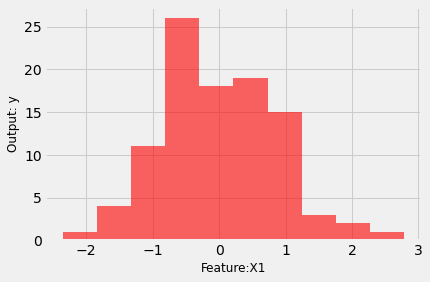

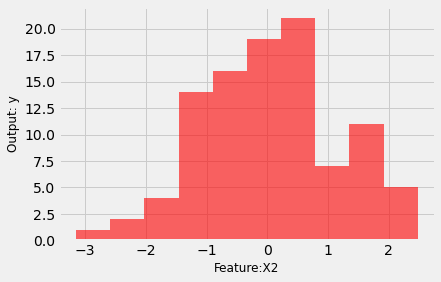

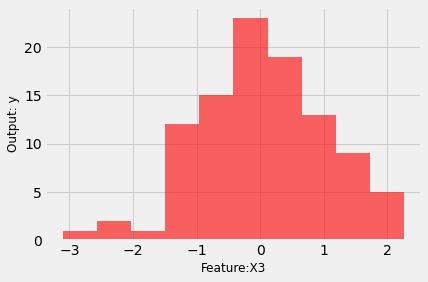

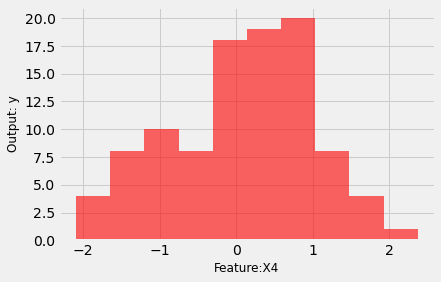

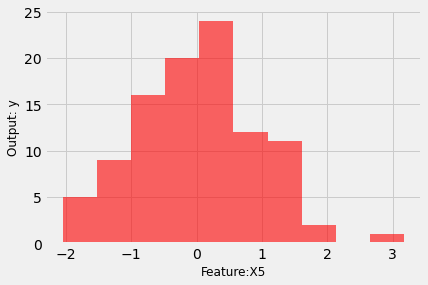

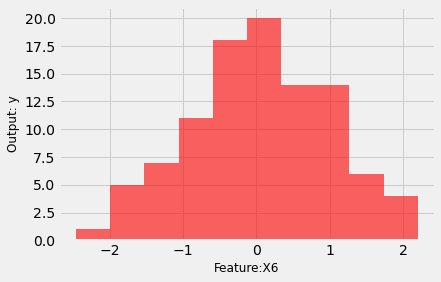

In [84]:
with plt.style.context(('fivethirtyeight')):
    for i,col in enumerate(df.columns[:-1]):
        plt.figure(figsize=(6,4))
        plt.grid(True)
        plt.xlabel('Feature:'+col,fontsize=12)
        plt.ylabel('Output: y',fontsize=12)
        plt.hist(df[col],alpha=0.6,facecolor='r')

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn import datasets
import scipy.stats as stats

In [86]:
clf = RandomForestRegressor()
scores = cross_val_score(clf, X, y, cv=10,scoring='neg_mean_squared_error') # 10-fold cross-validation
print("MSE:"+ str(-scores.mean()))

MSE:1931.9167496801358


In [87]:
clf = SVR()
scores = cross_val_score(clf, X, y, cv=10,scoring='neg_mean_squared_error')
print("MSE:"+ str(-scores.mean()))

MSE:10644.58299893585


In [88]:
clf = KNeighborsRegressor()
scores = cross_val_score(clf, X, y, cv=10,scoring='neg_mean_squared_error')
print("MSE:"+ str(-scores.mean()))

MSE:3203.3321741954333


In [89]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
def ANN(optimizer = 'adam',neurons=32,batch_size=32,epochs=50,activation='relu',patience=5,loss='mse'):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(X.shape[1],), activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer = optimizer, loss=loss)
    early_stopping = EarlyStopping(monitor="loss", patience = patience)# early stop patience
    history = model.fit(X, y,
              batch_size=batch_size,
              epochs=epochs,
              callbacks = [early_stopping],
              verbose=0) #verbose set to 1 will show the training process
    return model

In [90]:
clf = KerasRegressor(build_fn=ANN, verbose=0)
scores = cross_val_score(clf, X, y, cv=3,scoring='neg_mean_squared_error')
print("MSE:"+ str(-scores.mean()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


MSE:8028.143529904279


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      100 non-null    float64
 1   X2      100 non-null    float64
 2   X3      100 non-null    float64
 3   X4      100 non-null    float64
 4   X5      100 non-null    float64
 5   X6      100 non-null    float64
 6   y       100 non-null    float64
dtypes: float64(7)
memory usage: 5.6 KB


In [92]:
df.describe()

,X1,X2,X3,X4,X5,X6,y
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.022141,0.063718,0.003986,0.059381,0.043270,0.054429,3.224378
std,0.892548,1.108966,0.997391,0.927950,0.937078,0.967867,105.104415
min,-2.356743,-3.148979,-3.107380,-2.092194,-2.050533,-2.457482,-295.895335
25%,-0.566534,-0.695107,-0.613881,-0.620902,-0.573703,-0.580677,-61.899527
50%,-0.056113,0.059479,-0.050254,0.153700,0.052022,0.128818,-8.312260
75%,0.623654,0.765789,0.693017,0.790888,0.583743,0.781131,71.347401
max,2.785677,2.476447,2.267073,2.369410,3.176421,2.198076,336.862201


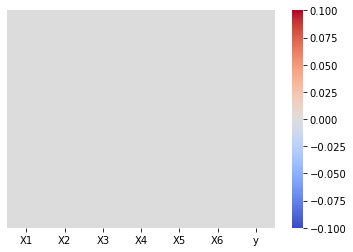

In [98]:
sns.heatmap(df.isnull(), cmap='coolwarm', yticklabels= False)

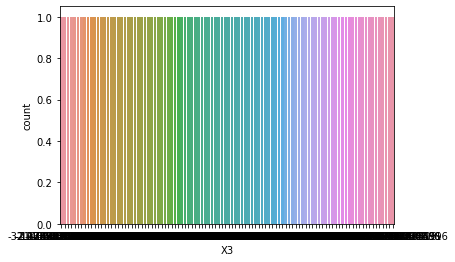

In [99]:
sns.countplot(x = df['X3'])

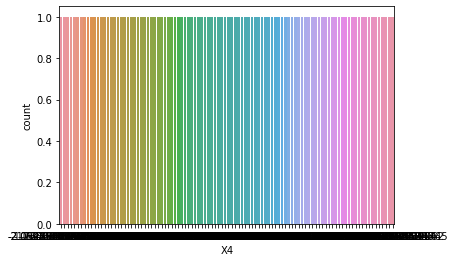

In [100]:
sns.countplot(x = df['X4'])

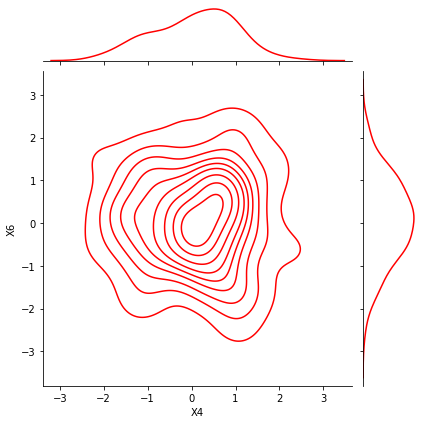

In [102]:
sns.jointplot(x = 'X4', y= 'X6', data = df, kind='kde', color = 'red')

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X = df.drop('X3', axis = 1)
y = df['X3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
X = df[['X3']].values 
Y = df[['X5']].values 

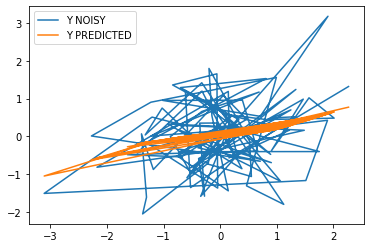

In [107]:
from math import ceil
import numpy as np
from scipy import linalg  
 
 
def lowess(x, y, f= 2. / 3., iter=3):
    
    n = len(x) # Number of x  points 
    r = int(ceil(f * n))  # Computing the residual of smoothing functions 
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)] # 
    w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)  # Weight Function 
    w = (1 - w ** 3) ** 3  # Tricube Weight Function
    ypred = np.zeros(n) # Initialisation of predictor 
    delta = np.ones(n)  # Initialisation of delta
   
    for iteration in range(iter):
        for i in range(n):
            weights = delta * w[:, i] # Cumulative Weights 
            b = np.array([np.sum(weights * y), np.sum(weights * y * x)]) # Matrix B
            A = np.array([[np.sum(weights), np.sum(weights * x)],
                          [np.sum(weights * x), np.sum(weights * x * x)]]) # Matrix A
                      
            beta = linalg.solve(A, b) # Beta,Solution of AX= B equation 
            ypred[i] = beta[0] + beta[1] * x[i]
             
        residuals = y - ypred   # Finding Residuals
        s = np.median(np.abs(residuals))  # Median of Residuals
        delta = np.clip(residuals / (6.0 * s), -1, 1)  # Delta
        delta = (1 - delta ** 2) ** 2   # Delta 
 
    return ypred
 
if __name__ == '__main__':  # Main Function
    
    import math
    
    n = 100  # Number of data points
   
    #Case1: Sinusoidal Fitting 
    x = X[:100].ravel()    
    y = Y[:100].ravel()   # Noisy data
       
    
    
    f = 0.66
    ypred = lowess(x, y, f=f, iter=3)  # Predicted Data
    
    import pylab as pl
    pl.clf()
    pl.plot(x, y, label='Y NOISY')
    pl.plot(x, ypred, label='Y PREDICTED')
    pl.legend()
    pl.show()

In [109]:
import dowhy
from dowhy import CausalModel
import dowhy.datasets

import econml
import warnings
warnings.filterwarnings('ignore')

BETA = 10

In [115]:
from econml.dml import DML
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor
est = DML(model_y=GradientBoostingRegressor(),
          model_t=GradientBoostingRegressor(),
          model_final=LassoCV(fit_intercept=False))

In [122]:
import inspect
import numpy as np
import warnings
from joblib import Parallel, delayed
from sklearn.linear_model import LassoCV, Lasso, LinearRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor


def cross_product(X1, X2):
    
    assert np.shape(X1)[0] == np.shape(X2)[0]
    return np.array([np.dot(X1[t].reshape(-1, 1), X2[t].reshape(1, -1)).flatten('F').T for t in range(np.shape(X1)[0])])


class HeteroDML(object):
    
    def __init__(self, poly_degree=3,
                            model_T=LassoCV(),
                            model_Y=LassoCV()):
        self.poly_degree = poly_degree
        self.model_T = model_T
        self.model_Y = model_Y
        self.model_final = LinearRegression(fit_intercept=False)
    
    def fit(self, W, x, T, Y):
        poly_x = PolynomialFeatures(degree=self.poly_degree, include_bias=True).fit_transform(x)
        composite_W = cross_product(poly_x, W)

        res_T = np.zeros(W.shape[0])
        res_Y = np.zeros(W.shape[0])
        
        kf = KFold(n_splits=2)
        for train_index, test_index in kf.split(W):
            # Split the data in half, train and test
            composite_W_train, W_train, T_train, Y_train = composite_W[train_index], W[train_index], T[train_index], Y[train_index]
            composite_W_test, W_test, T_test, Y_test  = composite_W[test_index], W[test_index], T[test_index], Y[test_index]
            
            # Fit with LassoCV the treatment as a function of W and the outcome as
            # a function of W, using only the train fold
            self.model_T.fit(W_train, T_train)
            self.model_Y.fit(composite_W_train, Y_train)
            
         
            res_T[test_index] = (T_test - self.model_T.predict(W_test))
            res_Y[test_index] = (Y_test - self.model_Y.predict(composite_W_test))
        
        self.model_final.fit(cross_product(poly_x, res_T.reshape(-1, 1)), res_Y.flatten())

    
    def predict(self, x):
        poly_x = PolynomialFeatures(degree=self.poly_degree, include_bias=True).fit_transform(x)
        return np.dot(poly_x, self.model_final.coef_.reshape(-1, 1)).flatten()


class ForestHeteroDML(object):
    
    def __init__(self):
        self.model_T = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_leaf=10)
        self.model_Y = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_leaf=10)
        self.model_final = RandomForestRegressor(n_estimators=100, max_depth=10, min_impurity_split=10)
    
    def fit(self, W, x, T, Y):

        res_T = np.zeros(W.shape[0])
        res_Y = np.zeros(W.shape[0])
        
        kf = KFold(n_splits=2)
        for train_index, test_index in kf.split(W):
            # Split the data in half, train and test
            x_train, W_train, T_train, Y_train = x[train_index], W[train_index], T[train_index], Y[train_index]
            x_test, W_test, T_test, Y_test  = x[test_index], W[test_index], T[test_index], Y[test_index]
            
            
            self.model_T.fit(W_train, T_train)
            self.model_Y.fit(np.concatenate((x_train, W_train), axis=1), Y_train)
            
           
            res_T[test_index] = (T_test - self.model_T.predict(W_test))
            res_Y[test_index] = (Y_test - self.model_Y.predict(np.concatenate((x_test, W_test), axis=1)))

        self.model_final.fit(np.concatenate((x, res_T.reshape(-1, 1)), axis=1), res_Y.flatten())
        self.res_T = res_T

    
    def predict(self, x):
       
        return np.mean([self.model_final.predict(np.concatenate((x, np.ones((x.shape[0],1))*t), axis=1)).flatten()/(t+0.00001) for  t in self.res_T.flatten()], axis=0).flatten()


In [126]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': [10, 20, 30],
    #'max_features': ['sqrt',0.5],
    'max_depth': [15,20,30,50],
    #'min_samples_leaf': [1,2,4,8],
    #"bootstrap":[True,False],
    #"criterion":['mse','mae']
}
clf = RandomForestRegressor(random_state=0)
grid = GridSearchCV(clf, rf_params, cv=3, scoring='neg_mean_squared_error')
grid.fit(X, y)
print(grid.best_params_)
print("MSE:"+ str(-grid.best_score_))

{'max_depth': 20, 'n_estimators': 20}
MSE:1.0562840272128313


In [127]:
from sklearn.model_selection import GridSearchCV
rf_params = {
    'C': [1,10, 100],
    "kernel":['poly','rbf','sigmoid'],
    "epsilon":[0.01,0.1,1]
}
clf = SVR(gamma='scale')
grid = GridSearchCV(clf, rf_params, cv=3, scoring='neg_mean_squared_error')
grid.fit(X, y)
print(grid.best_params_)
print("MSE:"+ str(-grid.best_score_))

{'C': 1, 'epsilon': 0.1, 'kernel': 'poly'}
MSE:0.8004480314930628


In [128]:
from sklearn.model_selection import GridSearchCV
rf_params = {
    'n_neighbors': [2, 3, 5, 7, 10]
}
clf = KNeighborsRegressor()
grid = GridSearchCV(clf, rf_params, cv=3, scoring='neg_mean_squared_error')
grid.fit(X, y)
print(grid.best_params_)
print("MSE:"+ str(-grid.best_score_))

{'n_neighbors': 10}
MSE:0.9304325488848337


In [131]:
from sklearn.model_selection import GridSearchCV
rf_params = {
    'optimizer': ['adam','rmsprop'],
    'activation': ['relu','tanh'],
    'loss': ['mse','mae'],
    'batch_size': [16,32],
    'neurons':[16,32],
    'epochs':[20,50],
    'patience':[2,5]
}
clf = KerasRegressor(build_fn=ANN, verbose=0)
grid = GridSearchCV(clf, rf_params, cv=3,scoring='neg_mean_squared_error')
grid.fit(X, y)
print(grid.best_params_)
print("MSE:"+ str(-grid.best_score_))

{'activation': 'tanh', 'batch_size': 32, 'epochs': 50, 'loss': 'mae', 'neurons': 32, 'optimizer': 'adam', 'patience': 5}
MSE:0.8025774287475474
